In [1]:
import pandas as pd
import helper
import numpy as np
import importlib
import tensorflow as tf
import matplotlib.pyplot as plt
import helper

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


## Load Dataset

In [2]:
main_df = pd.read_csv('data/main.csv', index_col=0)

## youngadult Modeling

### Feature Engineering

In [3]:
X = main_df.iloc[:,1:728]
X.head(3)

,18th century,1920s,1930s,1950s,1960s,1970s,1980s,19th century,2000s,20th century,...,women's fiction,work,workplace,world war i,world war ii,writers,writing,young adult,youth,zombies
0,0.000441,0.000259,0.000159,-0.000112,0.000384,-0.000082,0.000332,0.000805,0.019504,0.066409,...,0.088370,-0.000149,0.000423,0.000065,0.000219,0.579350,0.000434,0.862401,0.995364,-0.000051
1,0.000654,0.000313,0.000152,0.000059,0.066584,0.000036,0.000003,0.000256,0.003805,0.486342,...,0.241295,0.133587,0.000023,0.001527,0.000058,0.819140,0.000564,0.260314,0.029153,0.000096
2,0.000428,-0.000035,0.000469,0.000597,0.000225,0.204431,0.176913,0.000316,0.005482,0.734438,...,0.149466,0.000097,0.000067,0.340431,0.000439,0.805663,0.000345,0.199621,-0.000037,0.000985


In [4]:
y = main_df.iloc[:,728]
y.head(3)

0    0
1    0
2    0
Name: young-adult-lab, dtype: int64

In [5]:
column_name = list(X.columns)
X = np.asarray(X)
y = np.asarray(y)

### Training Test Val Split


For small datasets, a rule of thumb is to put 80% of the data in the training set, 10% in the validation set and 10% in the test set

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=42, stratify=y) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.12, random_state = 42, stratify=y_train)

### Baseline Model


This model chooses the most frequent class as the prediction

In [7]:
pd.DataFrame(y_val).value_counts()

0    802
1    211
dtype: int64

In [8]:
y_pred = [0 for i in range(len(y_val))]
#accuracy
from sklearn.metrics import accuracy_score

print('Val Accuracy: ', round(accuracy_score(y_val, y_pred),3))

#f1 score
from sklearn.metrics import f1_score

print('Val F1 score: ',round(f1_score(y_val, y_pred),3))

Val Accuracy:  0.792
Val F1 score:  0.0


### Logistic Regression with Neural Network

A good rule of thumb is to have the number of epochs 3 times the number of columns in your data. 




In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf.random.set_seed(42) 

model = Sequential()
model.add(Dense(1, input_shape = (727,), activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', helper.get_f1])

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 10)

#batch_size = all training samples
history = model.fit(X_train,y_train,epochs = 5000, batch_size = len(X_train), validation_data=[X_val, y_val], verbose = 0, callbacks=[early_stopping])

2023-05-19 08:38:24.861816: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-19 08:38:24.883660: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib64:
2023-05-19 08:38:24.883670: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-05-19 08:38:24.883958: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow bina

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 728       
                                                                 
Total params: 728
Trainable params: 728
Non-trainable params: 0
_________________________________________________________________


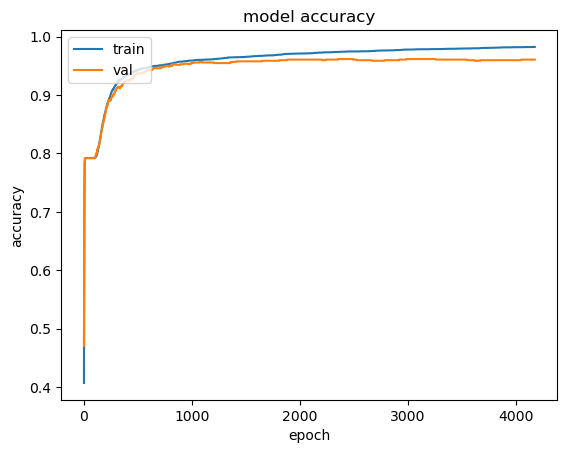

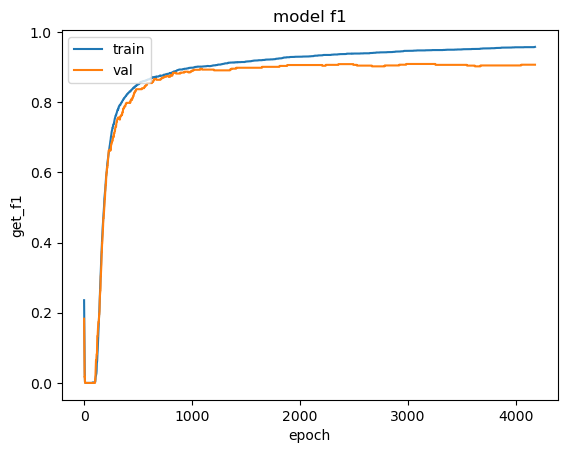

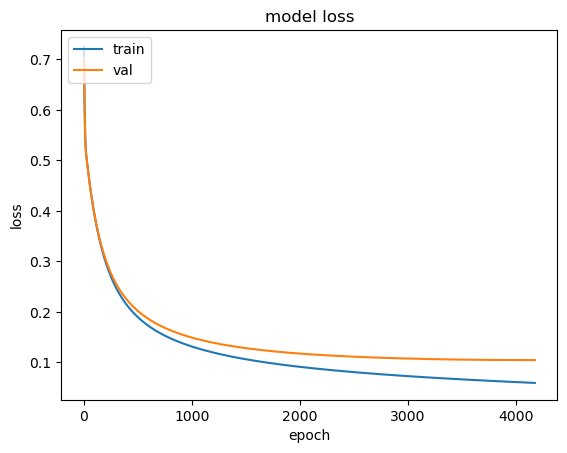

In [11]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for f1 score
plt.plot(history.history['get_f1'])
plt.plot(history.history['val_get_f1'])
plt.title('model f1')
plt.ylabel('get_f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
print('Val Accuracy of {epochs} is {number}'.format(epochs = len(history.history['val_accuracy'])-9, number = round(history.history['val_accuracy'][-10],3)))
print('Val F1 score of {epochs} is {number}'.format(epochs = len(history.history['val_get_f1'])-9, number = round(history.history['val_get_f1'][-10],3)))


Val Accuracy of 4166 is 0.961
Val F1 score of 4166 is 0.907


### Try sklearn Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, max_iter = 500)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [14]:
y_pred = lr.predict(X_val)

from sklearn.metrics import accuracy_score

print('Val Accuracy:', round(accuracy_score(y_val, y_pred),3))

from sklearn.metrics import f1_score

print('Val F1 score: ', round(f1_score(y_val,y_pred),3))

Val Accuracy: 0.961
Val F1 score:  0.907


In [15]:
pd.DataFrame(y_pred).value_counts()

0    792
1    221
dtype: int64

### ReLU hidden layer (10 units) + ReLU hidden layer (5 units) + Output layer

In [16]:
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(10, input_shape = (727,), activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', helper.get_f1])


from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 10)

history = model.fit(X_train,y_train,epochs = 5000, batch_size = len(X_train), validation_data=[X_val, y_val], verbose = 0, callbacks=[early_stopping])

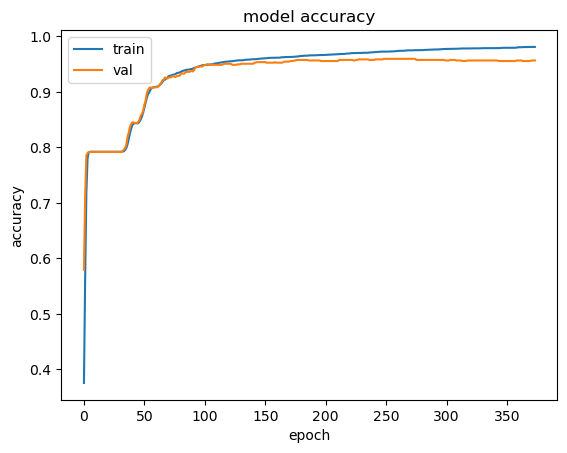

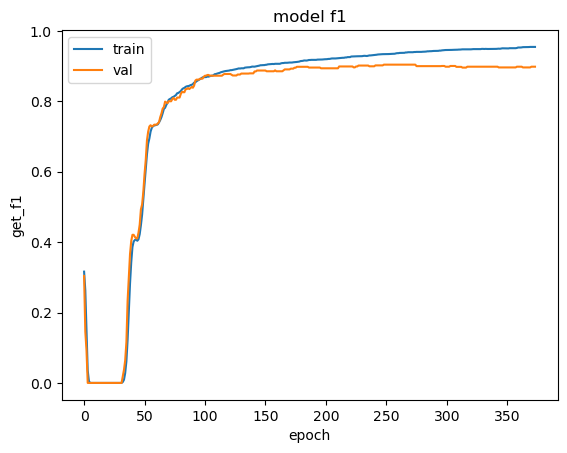

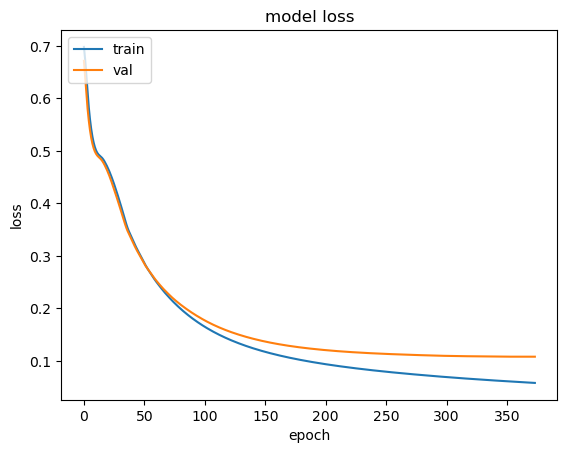

In [17]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for f1 score
plt.plot(history.history['get_f1'])
plt.plot(history.history['val_get_f1'])
plt.title('model f1')
plt.ylabel('get_f1')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
print('Val Accuracy of {epochs} is {number}'.format(epochs = len(history.history['val_accuracy'])-9, number = round(history.history['val_accuracy'][-10],3)))
print('Val F1 score of {epochs} is {number}'.format(epochs = len(history.history['val_get_f1'])-9, number = round(history.history['val_get_f1'][-10],3)))

Val Accuracy of 365 is 0.956
Val F1 score of 365 is 0.896


### Feature Scaling on X

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf.random.set_seed(42)

model = Sequential()
model.add(Dense(10, input_shape = (727,), activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', helper.get_f1])

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 10)

history = model.fit(X_train_scaled,y_train,epochs = 5000, batch_size = len(X_train_scaled), validation_data=[X_val_scaled, y_val], verbose = 0, callbacks=[early_stopping])

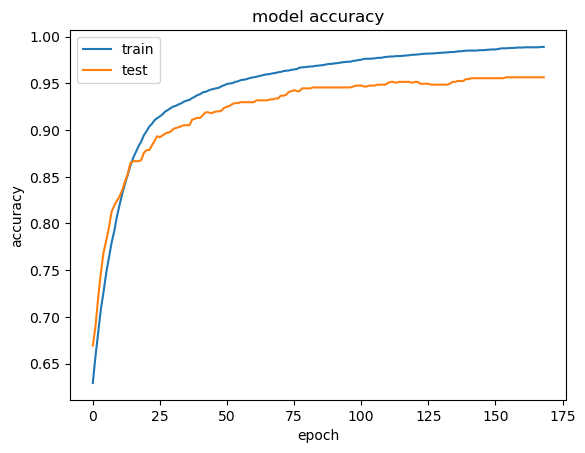

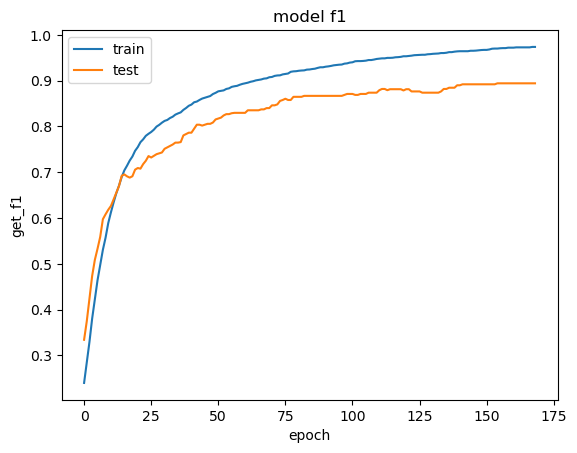

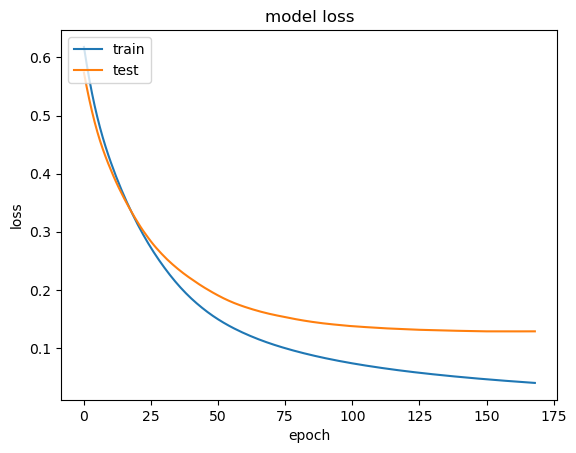

In [21]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for f1 score
plt.plot(history.history['get_f1'])
plt.plot(history.history['val_get_f1'])
plt.title('model f1')
plt.ylabel('get_f1')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
print('Val Accuracy of {epochs} is {number}'.format(epochs = len(history.history['val_accuracy'])-9, number = round(history.history['val_accuracy'][-10],3)))
print('Val F1 score of {epochs} is {number}'.format(epochs = len(history.history['val_get_f1'])-9, number = round(history.history['val_get_f1'][-10],3)))

Val Accuracy of 160 is 0.957
Val F1 score of 160 is 0.894


In [23]:
print('Training Accuracy of {epochs} is {number}'.format(epochs = len(history.history['accuracy'])-9, number = round(history.history['accuracy'][-10],3)))
print('Training F1 score of {epochs} is {number}'.format(epochs = len(history.history['get_f1'])-9, number = round(history.history['get_f1'][-10],3)))

Training Accuracy of 160 is 0.988
Training F1 score of 160 is 0.972


Feature scaling is doing a great job on the training set. However, overfitting problem. New data is too different to use the same scaling parameters

### Doing PCA

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA(random_state=42)
pca.fit(X_train_scaled)

PCA(random_state=42)

In [25]:
pca.explained_variance_ratio_[:50]

array([0.03468915, 0.0245405 , 0.02272699, 0.01937152, 0.01751057,
       0.01398917, 0.01349862, 0.01291169, 0.01221747, 0.01135933,
       0.01067618, 0.0102737 , 0.00986249, 0.00926734, 0.00851034,
       0.00814992, 0.00808705, 0.00773794, 0.00743798, 0.00717731,
       0.00694414, 0.00649219, 0.00642852, 0.00610408, 0.00582331,
       0.00554976, 0.0054361 , 0.0052524 , 0.00511097, 0.00505089,
       0.00489368, 0.00477418, 0.00450567, 0.00441871, 0.0043032 ,
       0.00417923, 0.00408375, 0.00402684, 0.00394195, 0.00385383,
       0.00377756, 0.00372122, 0.0036891 , 0.00359864, 0.00351127,
       0.00335218, 0.0032695 , 0.00322492, 0.00320121, 0.0030861 ])

In [26]:
cum_sum = 0
cum_sum_list = []
for i in pca.explained_variance_ratio_: 
    cum_sum = cum_sum+i
    cum_sum_list.append(cum_sum)


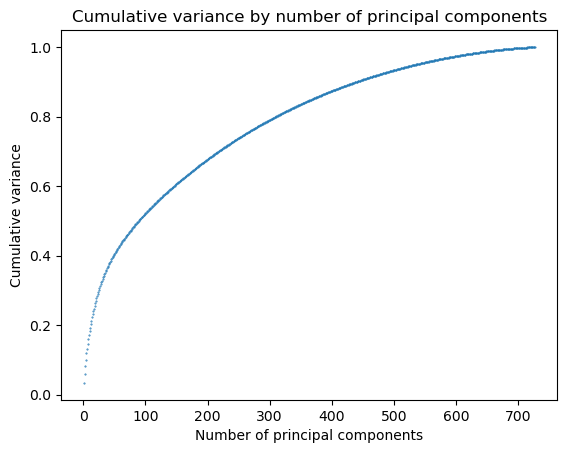

In [27]:
plt.scatter(range(1,pca.n_components_ + 1), cum_sum_list, s = 0.2)
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative variance")
plt.title("Cumulative variance by number of principal components")
plt.show()

In [28]:
for i, num in enumerate(cum_sum_list):
    if num > 0.95:
        print(i+1)
        break

536


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components = 536, random_state=42))])
X_train_scaled_pca = pipeline.fit_transform(X_train)
X_val_scaled_pca = pipeline.transform(X_val)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf.random.set_seed(42)

model = Sequential()
model.add(Dense(10, input_shape = (536,), activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', helper.get_f1])

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 10)

history = model.fit(X_train_scaled_pca,y_train,epochs = 5000, batch_size = len(X_train_scaled_pca), validation_data=[X_val_scaled_pca, y_val], verbose = 0, callbacks=[early_stopping])

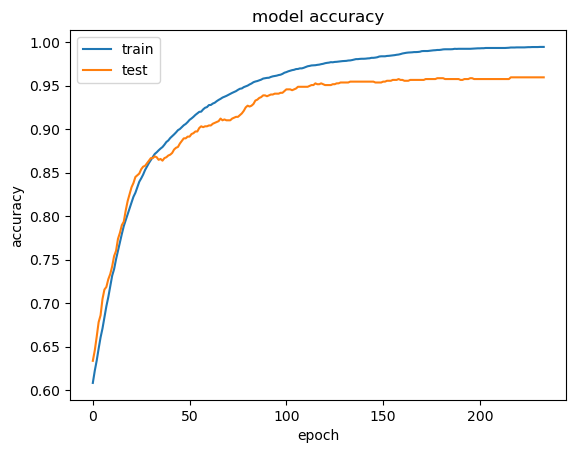

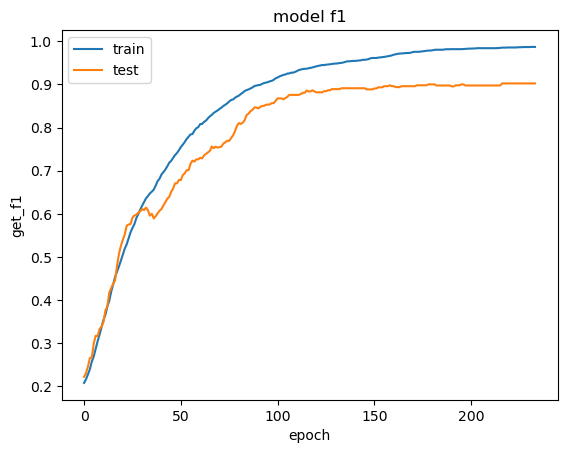

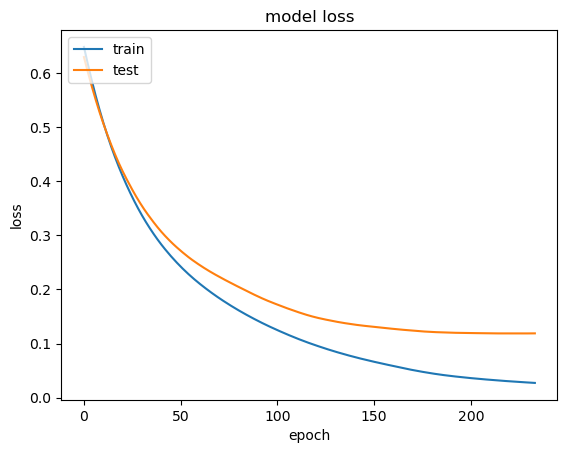

In [31]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for f1 score
plt.plot(history.history['get_f1'])
plt.plot(history.history['val_get_f1'])
plt.title('model f1')
plt.ylabel('get_f1')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
print('Val Accuracy of {epochs} is {number}'.format(epochs = len(history.history['val_accuracy'])-9, number = round(history.history['val_accuracy'][-10],3)))
print('Val F1 score of {epochs} is {number}'.format(epochs = len(history.history['val_get_f1'])-9, number = round(history.history['val_get_f1'][-10],3)))

Val Accuracy of 225 is 0.96
Val F1 score of 225 is 0.902


In [33]:
print('Training Accuracy of {epochs} is {number}'.format(epochs = len(history.history['accuracy'])-9, number = round(history.history['accuracy'][-10],3)))
print('Training F1 score of {epochs} is {number}'.format(epochs = len(history.history['get_f1'])-9, number = round(history.history['get_f1'][-10],3)))

Training Accuracy of 225 is 0.994
Training F1 score of 225 is 0.986


Same problem: overfitting

### Feature Ranking with RFE using sklearn Logreg

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. 

First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.



#### Choose 536 features

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

lr = LogisticRegression(random_state=42, max_iter = 500)
lr_selector = RFE(lr, n_features_to_select = 536)
lr_selector.fit(X_train, y_train)

X_train_selected = X_train[:,lr_selector.support_]
X_val_selected = X_val[:,lr_selector.support_]

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf.random.set_seed(42) 

model = Sequential()
model.add(Dense(10, input_shape = (536,), activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', helper.get_f1])

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 10)

#batch_size = all training samples
history = model.fit(X_train_selected,y_train,epochs = 5000, batch_size = len(X_train_selected), validation_data=[X_val_selected, y_val], verbose = 0, callbacks=[early_stopping])

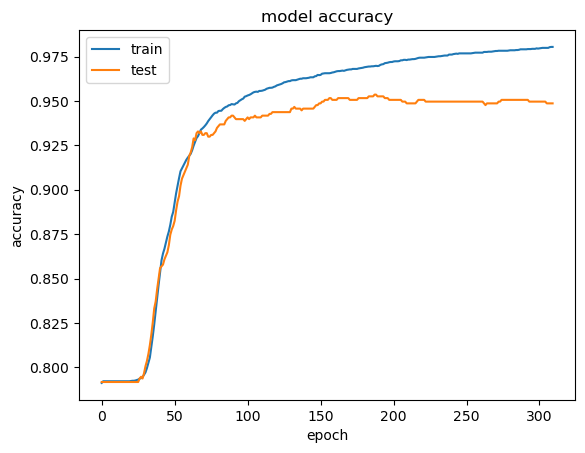

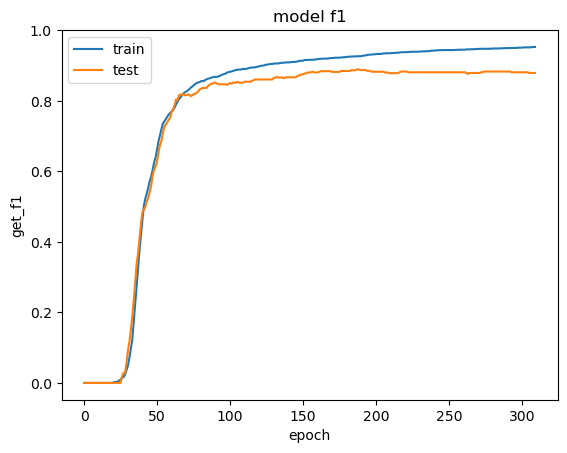

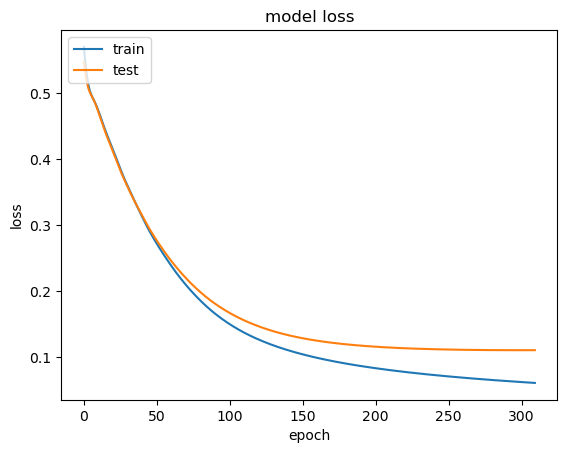

In [36]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for f1 score
plt.plot(history.history['get_f1'])
plt.plot(history.history['val_get_f1'])
plt.title('model f1')
plt.ylabel('get_f1')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
print('Val Accuracy of {epochs} is {number}'.format(epochs = len(history.history['val_accuracy'])-9, number = round(history.history['val_accuracy'][-10],3)))
print('Val F1 score of {epochs} is {number}'.format(epochs = len(history.history['val_get_f1'])-9, number = round(history.history['val_get_f1'][-10],3)))

Val Accuracy of 301 is 0.95
Val F1 score of 301 is 0.881


In [38]:
print('Training Accuracy of {epochs} is {number}'.format(epochs = len(history.history['accuracy'])-9, number = round(history.history['accuracy'][-10],3)))
print('Training F1 score of {epochs} is {number}'.format(epochs = len(history.history['get_f1'])-9, number = round(history.history['get_f1'][-10],3)))

Training Accuracy of 301 is 0.98
Training F1 score of 301 is 0.951


Does not improve much and overfit

#### Choose 200 features

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

lr = LogisticRegression(random_state=42, max_iter = 500)
lr_selector = RFE(lr, n_features_to_select = 200)
lr_selector.fit(X_train, y_train)

X_train_selected = X_train[:,lr_selector.support_]
X_val_selected = X_val[:,lr_selector.support_]

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf.random.set_seed(42) 

model = Sequential()
model.add(Dense(10, input_shape = (200,), activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', helper.get_f1])

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 10)

#batch_size = all training samples
history = model.fit(X_train_selected,y_train,epochs = 7000, batch_size = len(X_train_selected), validation_data=[X_val_selected, y_val], verbose = 0, callbacks=[early_stopping])

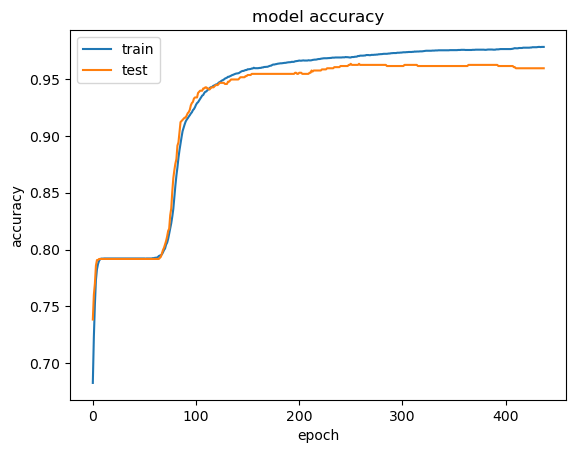

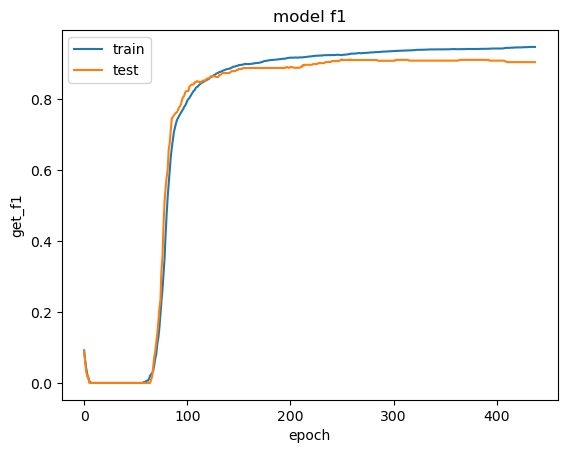

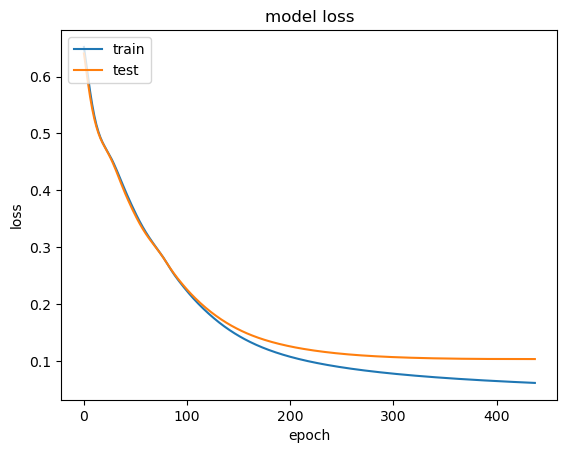

In [210]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for f1 score
plt.plot(history.history['get_f1'])
plt.plot(history.history['val_get_f1'])
plt.title('model f1')
plt.ylabel('get_f1')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
print('Val Accuracy of {epochs} is {number}'.format(epochs = len(history.history['val_accuracy'])-9, number = round(history.history['val_accuracy'][-10],3)))
print('Val F1 score of {epochs} is {number}'.format(epochs = len(history.history['val_get_f1'])-9, number = round(history.history['val_get_f1'][-10],3)))

Val Accuracy of 429 is 0.96
Val F1 score of 429 is 0.905


In [42]:
print('Training Accuracy of {epochs} is {number}'.format(epochs = len(history.history['accuracy'])-9, number = round(history.history['accuracy'][-10],3)))
print('Training F1 score of {epochs} is {number}'.format(epochs = len(history.history['get_f1'])-9, number = round(history.history['get_f1'][-10],3)))

Training Accuracy of 429 is 0.978
Training F1 score of 429 is 0.947


### Run Random Forest RFE to get ranking of all features

#### Run RFE

In [7]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_selector = RFE(rf_clf, n_features_to_select = 1)
rf_selector.fit(X_train, y_train)


In [13]:
from numpy import savetxt
savetxt('data/rf_selector_ranking.csv', rf_selector.ranking_, delimiter=',')

#### Run Neural Network, adding 1 feature at a time

In [11]:
ranking = np.array(pd.read_csv('data/rf_selector_ranking.csv', names = ['rank'])).astype('int64').reshape(-1)

ranking_dict = {}

for i,rank in enumerate(ranking):
    ranking_dict[rank] = i

In [12]:
importlib.reload(helper)
val_loss_list = []
val_accuracy_list = []
val_f1_list = []
num_epochs_list = []

for i in range(1,728):
    index = [ranking_dict[j] for j in range(1,i+1)]
    val_loss, val_accuracy, val_f1, num_epochs = helper.run_nn(X_train[:,index],y_train, X_val[:,index], y_val, i)
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_accuracy)
    val_f1_list.append(val_f1)
    num_epochs_list.append(num_epochs)

2023-05-19 09:51:25.771848: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-19 09:51:25.801737: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib64:
2023-05-19 09:51:25.801753: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-05-19 09:51:25.802185: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow bina

In [ ]:
rf_selector_result = pd.DataFrame({'Num Features':range(1,728), 'Val Accuracy':val_accuracy_list, 'Val Loss': val_loss_list, 'Val F1': val_f1_list, 'Num Epochs': num_epochs_list})
rf_selector_result.to_csv('data/rf_selector_result.csv')

In [12]:
rf_selector_result = pd.read_csv('data/rf_selector_result.csv')

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


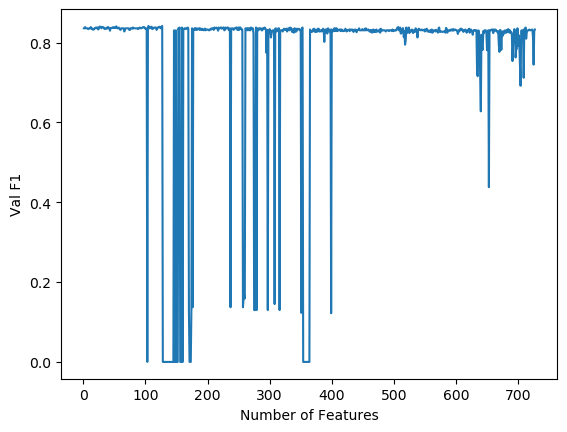

In [163]:
plt.plot(rf_selector_result['Num Features'], rf_selector_result['Val F1'])
plt.xlabel('Number of Features')
plt.ylabel('Val F1')
plt.show()

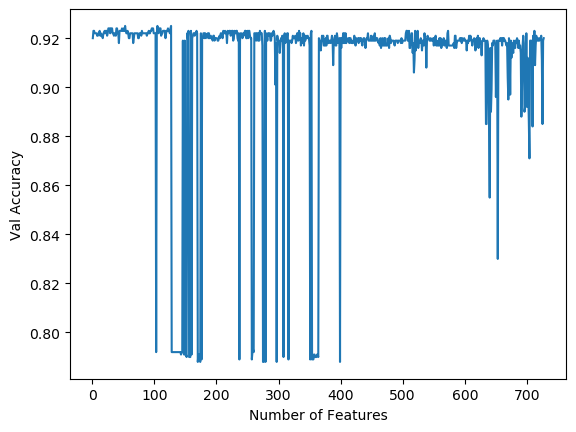

In [168]:
plt.plot(rf_selector_result['Num Features'], rf_selector_result['Val Accuracy'])
plt.xlabel('Number of Features')
plt.ylabel('Val Accuracy')
plt.show()

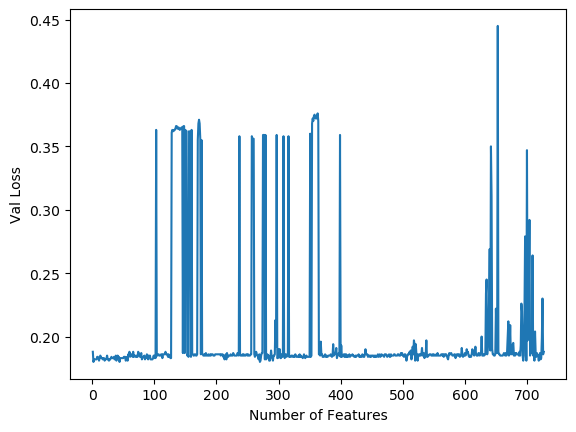

In [169]:
plt.plot(rf_selector_result['Num Features'], rf_selector_result['Val Loss'])
plt.xlabel('Number of Features')
plt.ylabel('Val Loss')
plt.show()

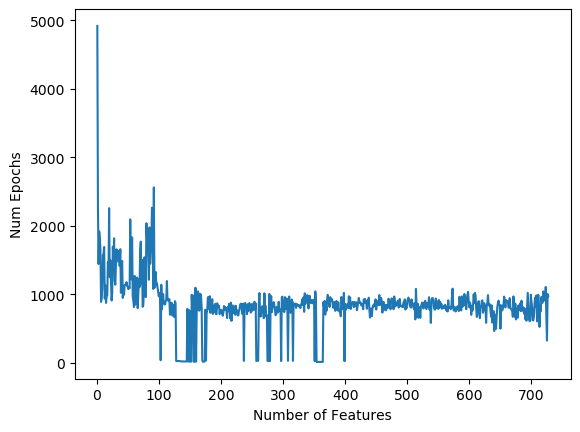

In [170]:
plt.plot(rf_selector_result['Num Features'], rf_selector_result['Num Epochs'])
plt.xlabel('Number of Features')
plt.ylabel('Num Epochs')
plt.show()

In [199]:
rf_selector_result['Smoothing Num Epochs'] = rf_selector_result['Num Epochs'].rolling(10, center = True).mean()
rf_selector_result['Smoothing Val F1'] = rf_selector_result['Val F1'].rolling(10, center = True).mean()
rf_selector_result['Smoothing Val Accuracy'] = rf_selector_result['Val Accuracy'].rolling(10, center = True).mean()
rf_selector_result['Smoothing Val Loss'] = rf_selector_result['Val Loss'].rolling(10, center = True).mean()

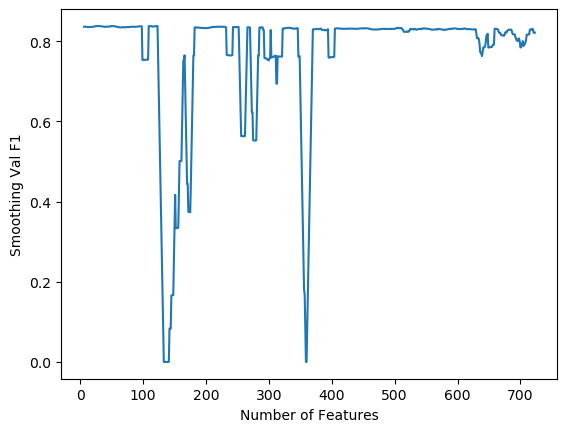

In [200]:
plt.plot(rf_selector_result['Num Features'], rf_selector_result['Smoothing Val F1'])
plt.xlabel('Number of Features')
plt.ylabel('Smoothing Val F1')
plt.show()

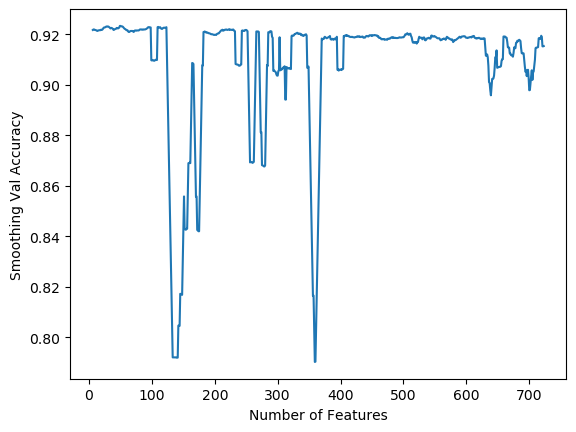

In [201]:
plt.plot(rf_selector_result['Num Features'], rf_selector_result['Smoothing Val Accuracy'])
plt.xlabel('Number of Features')
plt.ylabel('Smoothing Val Accuracy')
plt.show()

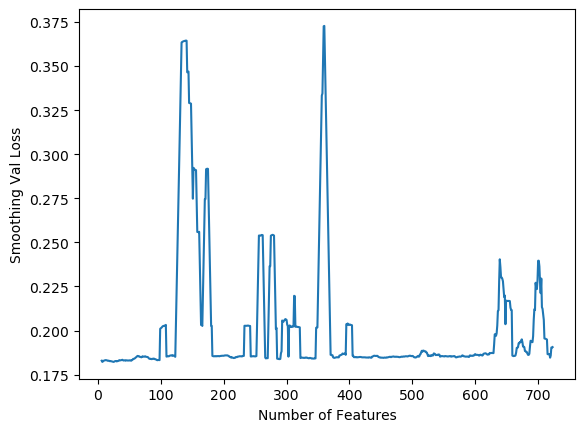

In [202]:
plt.plot(rf_selector_result['Num Features'], rf_selector_result['Smoothing Val Loss'])
plt.xlabel('Number of Features')
plt.ylabel('Smoothing Val Loss')
plt.show()

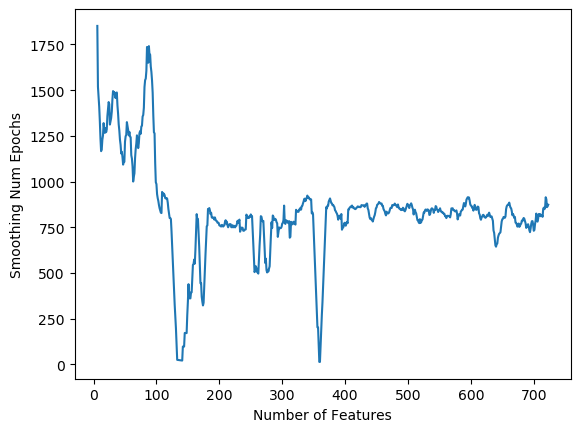

In [203]:
plt.plot(rf_selector_result['Num Features'], rf_selector_result['Smoothing Num Epochs'])
plt.xlabel('Number of Features')
plt.ylabel('Smoothing Num Epochs')
plt.show()

### Output top features

In [6]:
ranking = np.array(pd.read_csv('data/rf_selector_ranking.csv', names = ['rank'])).astype('int64').reshape(-1)

In [7]:
ranking_dict = {}

for i,rank in enumerate(ranking):
    ranking_dict[rank] = i

In [8]:
#top 1
column_name[ranking_dict[1]]

'teen'

In [9]:
#top 2
column_name[ranking_dict[2]]

'adult'

In [10]:
#top 3
column_name[ranking_dict[3]]

'young adult'

In [11]:
#top 4
column_name[ranking_dict[4]]

'romance'

In [12]:
#top 5
column_name[ranking_dict[5]]

'fantasy'

In [15]:
#top 6
column_name[ranking_dict[6]]

'high school'

In [25]:
features_ordered_by_ranking = []
for i in range(1,728):
    features_ordered_by_ranking.append(column_name[ranking_dict[i]])

features_ordered_by_ranking_df = pd.DataFrame({"rank":range(1,728), "feature":features_ordered_by_ranking})
features_ordered_by_ranking_df.to_csv("data/rf_selector_ranking_features.csv")

#### Sanity Check

##### Check top 1

In [14]:
result = helper.run_nn(X_train[:,ranking_dict[1]],y_train, X_val[:,ranking_dict[1]], y_val, 1)
"Val Loss: {}, Val accuracy: {}, Val F1: {}, Num epochs: {}".format(result[0],result[1],result[2],result[3])

NameError: name 'X_train' is not defined

In [ ]:
rf_selector_result = pd.read_csv('data/rf_selector_result.csv', index_col = 0)

In [ ]:
rf_selector_result.iloc[0,:]

Num Features       1.000
Val Accuracy       0.920
Val Loss           0.188
Val F1             0.836
Num Epochs      4916.000
Name: 0, dtype: float64

##### Check top 2

In [ ]:
column_name[ranking_dict[2]]

'adult'

In [ ]:
X_train[:,[ranking_dict[1], ranking_dict[2]]]

array([[1.2634027e-01, 6.5799105e-01],
       [1.5834612e-01, 4.4215322e-01],
       [1.1811656e-01, 7.6887560e-01],
       ...,
       [5.7283460e-02, 7.3174030e-01],
       [2.1836162e-04, 8.2272720e-01],
       [2.4179399e-02, 8.3084106e-01]])

In [ ]:
X_train[:,ranking_dict[1]]

array([0.12634027, 0.15834612, 0.11811656, ..., 0.05728346, 0.00021836,
       0.0241794 ])

In [ ]:
result = helper.run_nn(X_train[:,[ranking_dict[1], ranking_dict[2]]],y_train,X_val[:,[ranking_dict[1], ranking_dict[2]]], y_val, 2)
"Val Loss: {}, Val accuracy: {}, Val F1: {}, Num epochs: {}".format(result[0],result[1],result[2],result[3])

'Val Loss: 0.18, Val accuracy: 0.923, Val F1: 0.838, Num epochs: 2283'

In [ ]:
rf_selector_result.iloc[1,:]

Num Features       2.000
Val Accuracy       0.923
Val Loss           0.180
Val F1             0.838
Num Epochs      2283.000
Name: 1, dtype: float64

##### Check the last feature

In [ ]:
column_name[ranking_dict[727]]

'divorce'

In [ ]:
result = helper.run_nn(X_train[:,ranking_dict[727]],y_train, X_val[:,ranking_dict[727]], y_val, 1)
"Val Loss: {}, Val accuracy: {}, Val F1: {}, Num epochs: {}".format(result[0],result[1],result[2],result[3])

'Val Loss: 0.513, Val accuracy: 0.792, Val F1: 0.0, Num epochs: 542'

##### Check all features

In [ ]:
result = helper.run_nn(X_train,y_train, X_val, y_val, 727)
"Val Loss: {}, Val accuracy: {}, Val F1: {}, Num epochs: {}".format(result[0],result[1],result[2],result[3])

'Val Loss: 0.108, Val accuracy: 0.957, Val F1: 0.898, Num epochs: 374'

In [ ]:
rf_selector_result.iloc[-1,:]

Num Features    727.000
Val Accuracy      0.956
Val Loss          0.108
Val F1            0.896
Num Epochs      359.000
Name: 726, dtype: float64

The results are slightly different. Check to see if the order of columns can affect the neural network

In [ ]:
import numpy as np
row = list(range(727))
np.random.shuffle(row)

In [ ]:
result = helper.run_nn(X_train[:,row],y_train, X_val[:,row], y_val, 727)
"Val Loss: {}, Val accuracy: {}, Val F1: {}, Num epochs: {}".format(result[0],result[1],result[2],result[3])

'Val Loss: 0.106, Val accuracy: 0.957, Val F1: 0.898, Num epochs: 345'

The results are different when shuffling

In [ ]:
result = helper.run_nn(X_train[:,[ranking_dict[i] for i in range(1,728)]],y_train, X_val[:,[ranking_dict[i] for i in range(1,728)]], y_val, 727)
"Val Loss: {}, Val accuracy: {}, Val F1: {}, Num epochs: {}".format(result[0],result[1],result[2],result[3])

'Val Loss: 0.108, Val accuracy: 0.956, Val F1: 0.896, Num epochs: 359'